In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
out_dir=["./NoteBook_preprocessWithinClass_addInstrument/","./NaiveBayesian_AddInstrument/","./SVM_AddInstrument/"]
filename_out = "synthetic_observational_cate" 
metrics = ["energy_distance"]
#metrics = ["energy_distance","x"]

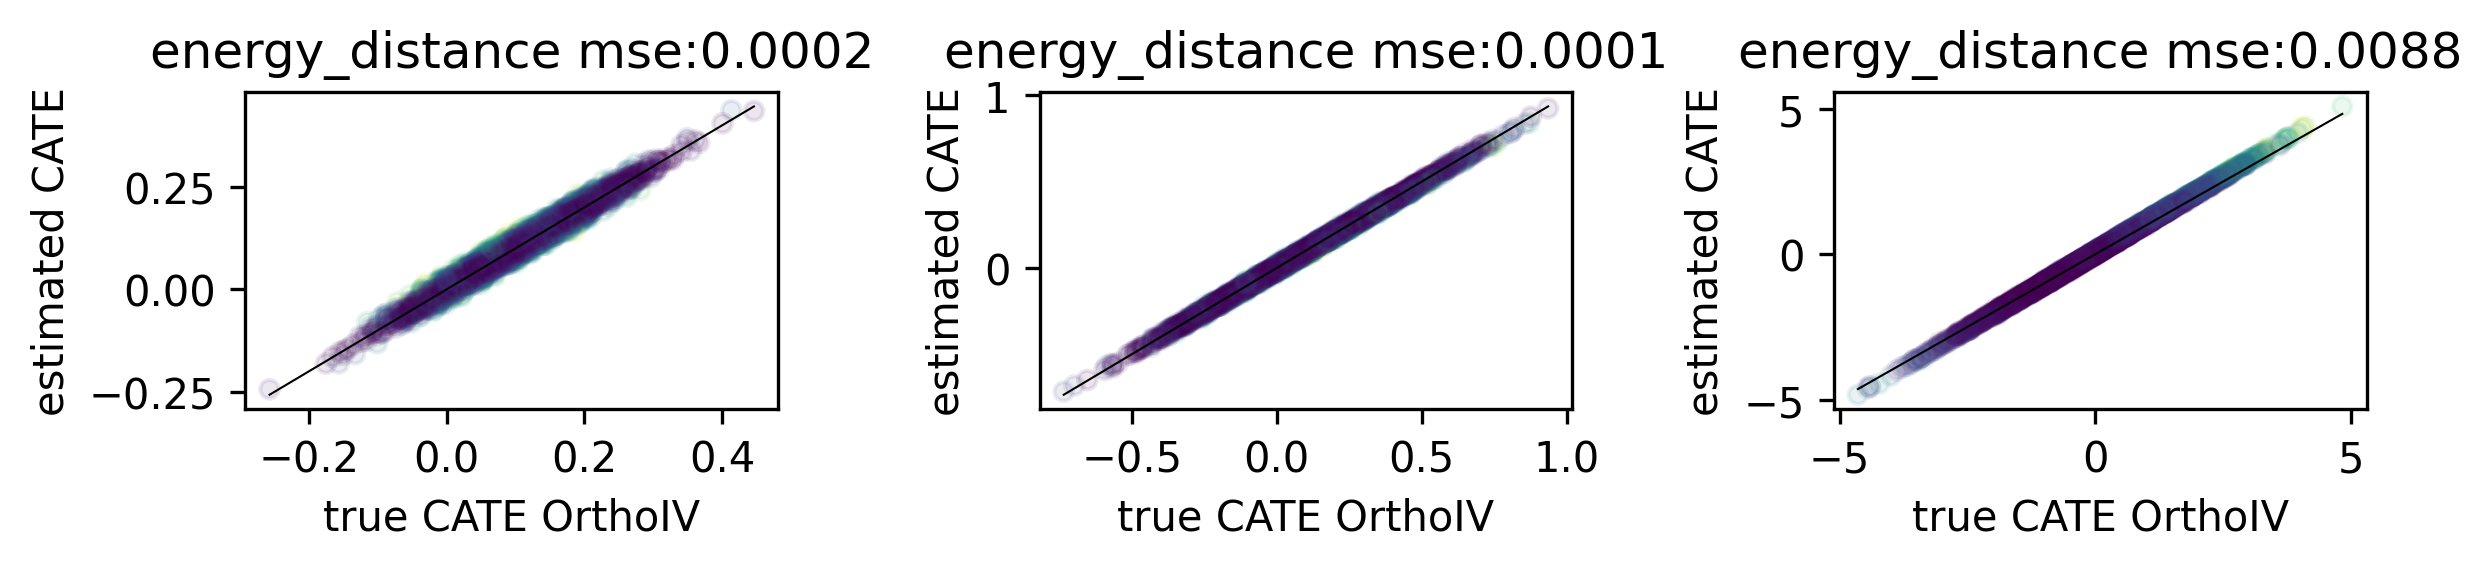

In [3]:
%matplotlib inline
f, axs = plt.subplots(1,len(out_dir),figsize=(8,2),dpi=300)

for i in range(len(out_dir)):
    try:
        with open(f"{out_dir[i]}{filename_out}_{metrics[0]}_run_1.pkl","rb") as f:
            results = pickle.load(f)
            
        CATE_gt = results["scores_per_estimator"][results["best_estimator"]][0]["test"]["CATE_groundtruth"].values
        CATE_est = np.array(results["scores_per_estimator"][results["best_estimator"]][0]["test"]["CATE_estimate"]).reshape(-1,)
        e=(CATE_gt-CATE_est)**2
        mse=np.mean((CATE_gt-CATE_est)**2)
        axs[i].scatter(CATE_gt,CATE_est,s=20,alpha=0.1,c=e,cmap='viridis')          
        axs[i].plot([min(CATE_gt),max(CATE_gt)],[min(CATE_gt),max(CATE_gt)],"k-",linewidth=0.5)
        axs[i].set_xlabel(f"true CATE {results['best_estimator'].split('.')[-1]}")
        axs[i].set_ylabel("estimated CATE")
        axs[i].set_title(f"{results['optimised_metric']} mse:{mse:1.4f}")
        #ax.set_aspect('equal', adjustable='box')
        #ax.set_xlim([-15,15])
        #ax.set_ylim([-15,15])
        #ax.set_xticks(np.arange(-0.5,0.51,0.5))
        #ax.set_yticks(np.arange(-0.5,0.51,0.5))
        #ax.spines["top"].set_visible(False)
        #ax.spines["right"].set_visible(False)
    except(e):
        print(f"here {e}")
        pass

plt.tight_layout() 
plt.savefig('MSE.png')

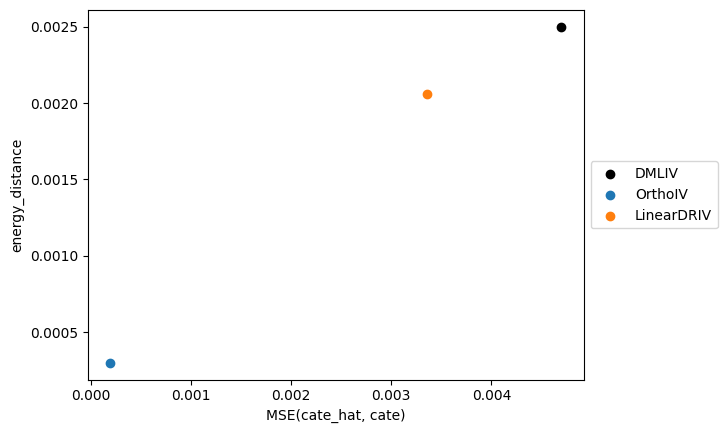

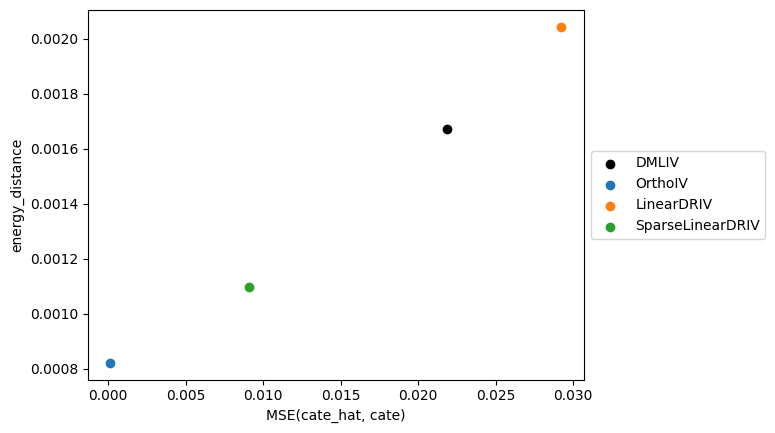

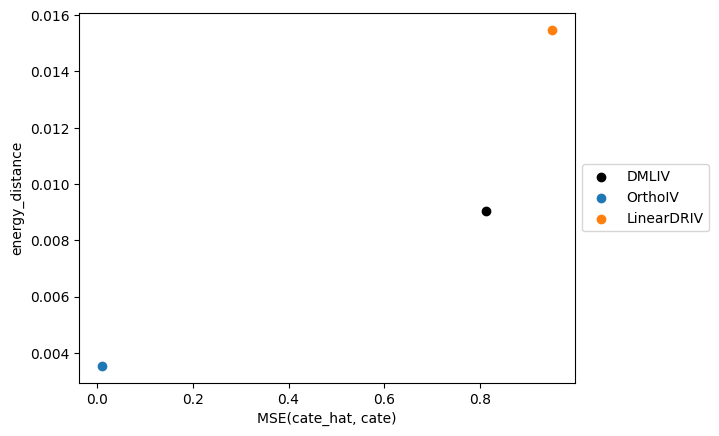

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ([matplotlib.colors.CSS4_COLORS['black']] +
    list(matplotlib.colors.TABLEAU_COLORS) + [
    matplotlib.colors.CSS4_COLORS['lime'],
    matplotlib.colors.CSS4_COLORS['yellow'],
    matplotlib.colors.CSS4_COLORS['pink']
])
for out in out_dir: 
    for metric in ["energy_distance"]:
        with open(f"{out}/synthetic_observational_cate_{metric}_run_1.pkl","rb") as f:
            results = pickle.load(f)
    
        plt.figure()
    
        for (est_name, scr), col in zip(results["scores_per_estimator"].items(),colors):
            if "NewDummy" in est_name:
                pass
            else:
                true_ate = scr[0]["test"]["CATE_groundtruth"].values
                estimated_ate = scr[0]["test"]["CATE_estimate"].reshape(-1,)
                mse = np.mean((true_ate-estimated_ate)**2)
                plt.scatter(mse,scr[0]["test"][metric],color=col)
        plt.xlabel("MSE(cate_hat, cate)")
        plt.ylabel(metric)
        plt.legend([k.split(".")[-1] for k in results["scores_per_estimator"].keys() if "NewDummy" not in k],loc='center left', bbox_to_anchor=(1, 0.5))


In [36]:
results["scores_per_estimator"].keys()

dict_keys(['iv.econml.iv.dml.DMLIV', 'iv.econml.iv.dml.OrthoIV', 'iv.econml.iv.dr.LinearDRIV'])